# Logistic Regression (Titanic dataset)

### IMPORT

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Load data

In [47]:
train_data = pd.read_csv('titanic_train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

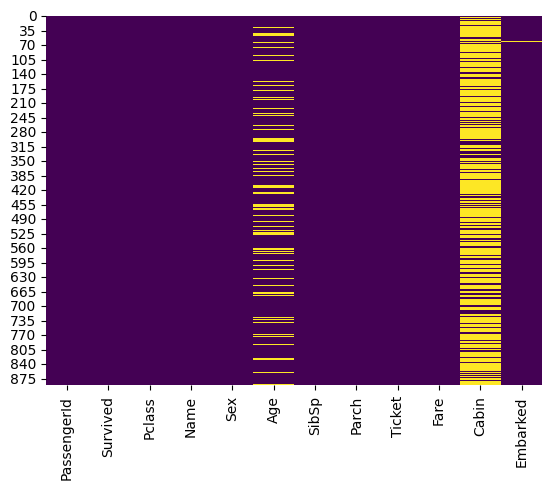

In [41]:
sns.heatmap(train_data.isna(), cbar=False, cmap='viridis')

### Some missing data in Age

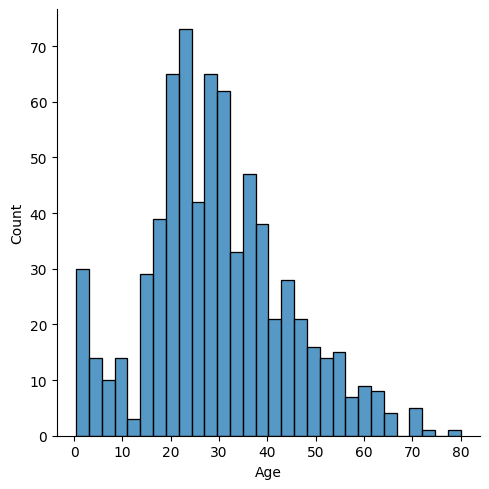

In [19]:
sns.displot(train_data['Age'].dropna(), kde=False, bins=30)

<Axes: xlabel='Survived', ylabel='count'>

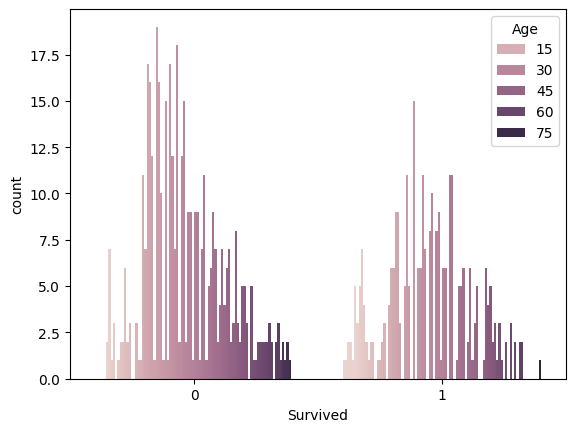

In [20]:
sns.countplot(x='Survived', hue='Age', data=train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

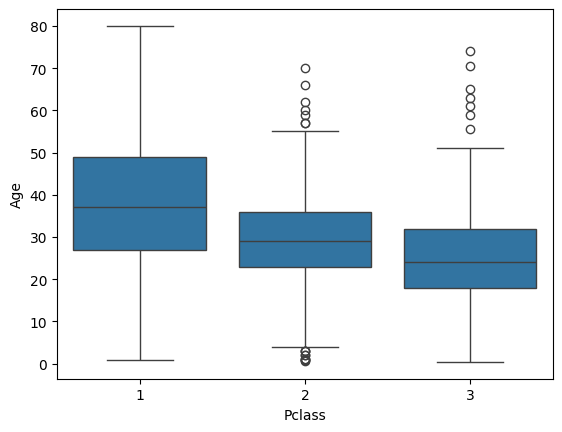

In [21]:
sns.boxplot(x='Pclass', y='Age', data=train_data)

### Based on passenger class, we will impute the age to average

In [37]:
def impute_age(cols):
    age = cols['Age']
    pclass = cols['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [48]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

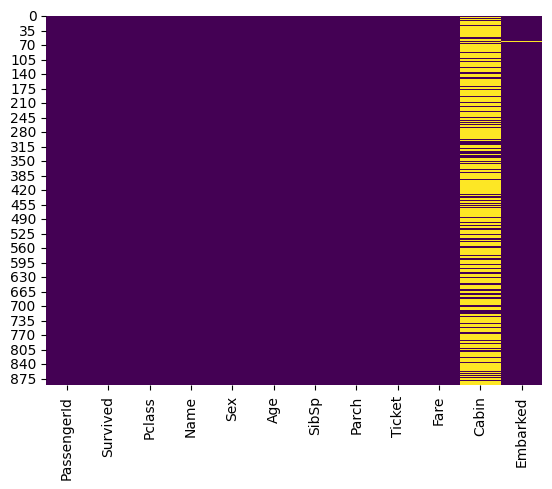

In [49]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')

### Drop Cabin column as most of it is missing

In [51]:
train_data.drop('Cabin', axis=1, inplace=True)

### Drop remaining null values

In [52]:
train_data.dropna(inplace=True)

<Axes: >

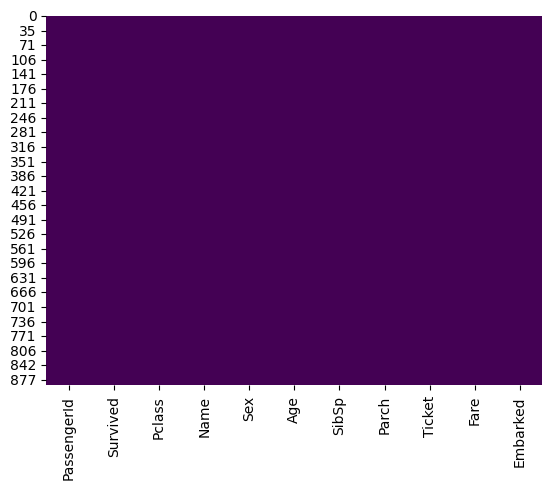

In [53]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')

### Convert categorical features to dummy variables

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [57]:
sex = pd.get_dummies(train_data["Sex"], drop_first=True)
embark = pd.get_dummies(train_data["Embarked"], drop_first=True)

In [59]:
train_data = train_data.drop(['PassengerId','Name','Ticket',"Sex","Embarked"], axis=1)

In [60]:
train_data = pd.concat([train_data, sex, embark], axis=1)

### Split train and test

In [63]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model

In [65]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/home/rishi/GITHUB_REPOS/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions = logistic_regression.predict(X_test)

### Evaluation

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [71]:
print(confusion_matrix(y_test, predictions))

[[147  16]
 [ 30  74]]
